In [28]:
import pandas as pd
import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
data=[]
def commentscrap(url):
    with Chrome() as driver: #Access the URL you want with the driver.get function
        wait = WebDriverWait(driver,20) #Selenium will wait for a maximum of 20 seconds
        driver.get(url) #Access the URL you want with the driver.get function

        for item in range(10): #by increasing the highest range you can get more content
            wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) #Scroll down and wait until everything is visible with wait.until and EC.visibility_of_element_located.
            time.sleep(5)

        for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#comment #content-text"))):
            print(data.append(comment.text))

In [29]:
url='https://www.youtube.com/watch?v=s0dMTAQM4cw' #our AI video page we will scrap data from
commentscrap(url)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [30]:
import pandas as pd   
df = pd.DataFrame(data, columns=['comment']) #appending comments to dataset
df

,comment
0,It’s just interesting seeing how people who ch...
1,It's great that algorithms can help people in ...
2,“Your scientists were so preoccupied with whet...
3,Everything needs energy to drive its movement....
4,As I watched I kept returning to the scene of ...
...,...
595,Woman and children should be a priority always...
596,RESET- this is only applicable to cassette pla...
597,A world without people
598,I went to the robot cafe three plus years ago ...


In [31]:
df.to_csv('comments.txt', index=False) #saved as .txt file

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA #allows us to calculate # of components needed to explain data

vectorizer=CountVectorizer()
x_vectorize=vectorizer.fit_transform(df.comment).toarray() #to turn the sentences into values
x_vectorize.shape               
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_vectorize) #reducing the dimentionality to 2

df['x']=x_pca[:,0]
df['y']=x_pca[:,1]

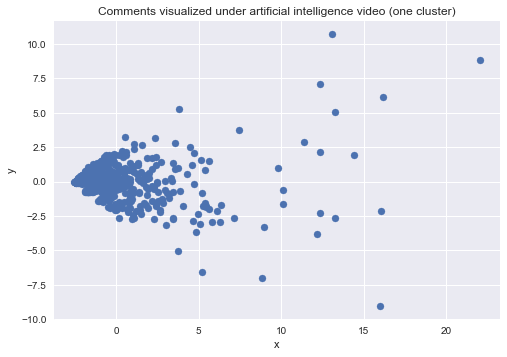

In [33]:
import matplotlib.pyplot as plt
plt.style.use('fast')
plt.title('Comments visualized under artificial intelligence video (one cluster)')
plt.xlabel("x")
plt.ylabel("y")
plt.style.use("seaborn")
plt.scatter(x_pca[:,0],x_pca[:,1]); #visualizing all clusters on same panel

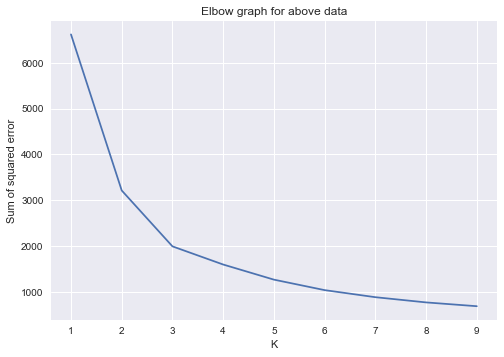

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

sse = []
k_rng = range(1,10) 
for k in k_rng: #this code is used to calculate the sse for all the k values in the range 1-10
    km = KMeans(n_clusters=k)
    km.fit(df[['x','y']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Elbow graph for above data')
plt.plot(k_rng,sse);

In [35]:
km = KMeans(n_clusters=3) #elbow looks like it can be at 2, + also same # of opinions most people can have on it (for/against it)
y_predicted = km.fit_predict(df[['x','y']])
y_predicted

df['cluster']=y_predicted
df.head()

,comment,x,y,cluster
0,It’s just interesting seeing how people who ch...,1.847510,-0.425175,1
1,It's great that algorithms can help people in ...,1.048774,1.134794,0
2,“Your scientists were so preoccupied with whet...,-1.611482,0.668985,0
3,Everything needs energy to drive its movement....,-0.843080,0.920670,0
4,As I watched I kept returning to the scene of ...,16.051582,-2.125191,2


In [36]:
km.cluster_centers_ #center of the clusters

array([[-1.16933184,  0.13354631],
       [ 2.84043219, -0.77337149],
       [12.85875338,  1.32504663]])

In [37]:
#making dataframes for each cluster we want to project
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

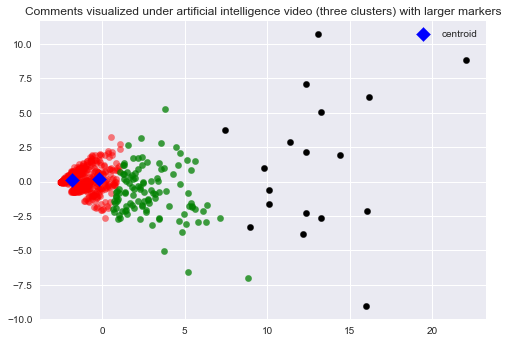

In [54]:
plt.title('Comments visualized under artificial intelligence video (three clusters) with larger markers')

plt.scatter(df1.x,df1.y,color='red',s=40,alpha=0.5)
plt.scatter(df2.x,df2.y,color='green',s=40,alpha=0.75)
plt.scatter(df3.x,df3.y,color='black',s=40, alpha=1)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='D',s=100,label='centroid');
plt.legend();

In [39]:
df[df['cluster']==0] #red cluster

,comment,x,y,cluster
1,It's great that algorithms can help people in ...,1.048774,1.134794,0
2,“Your scientists were so preoccupied with whet...,-1.611482,0.668985,0
3,Everything needs energy to drive its movement....,-0.843080,0.920670,0
5,"As always, very enlightening. The design resea...",0.294542,-0.438839,0
6,“Once men turned their thinking over to machin...,-0.194918,0.360072,0
...,...,...,...,...
595,Woman and children should be a priority always...,-0.512669,0.691492,0
596,RESET- this is only applicable to cassette pla...,-1.292363,0.756731,0
597,A world without people,-2.416360,-0.008059,0
598,I went to the robot cafe three plus years ago ...,-0.737089,-0.055933,0


In [40]:
df[df['cluster']==1] #green cluster

,comment,x,y,cluster
0,It’s just interesting seeing how people who ch...,1.847510,-0.425175,1
7,"Having studied AI at MIT, interestingly, the f...",5.451701,-1.749646,1
10,The part with accident avoidance reminds me of...,3.769694,-5.026646,1
11,"I'm all for this sort of tech, but always wond...",3.736712,1.014898,1
13,Each breakthrough technology has its advantage...,2.962652,-0.607574,1
...,...,...,...,...
565,39:58 Very easy solution. Let us choose the ac...,5.069282,-3.100040,1
571,"Law makers and law enforcers, who will be liab...",1.817162,0.445238,1
574,If you take away the option to pay with cash i...,3.215027,-0.887614,1
584,Replicating the human is a little harder than ...,1.714302,-1.530034,1


In [41]:
df[df['cluster']==2] #black cluster

,comment,x,y,cluster
4,As I watched I kept returning to the scene of ...,16.051582,-2.125191,2
19,"Don't forget that Germans are being told, not ...",11.415789,2.874226,2
60,Biological evolution itself is basically a sel...,16.163707,6.130824,2
98,There are infinite reasons we would choose whi...,13.281739,-2.677539,2
120,In some countries the majority of citizens sti...,22.034703,8.799794,2
147,It seems that nobody from the people who can m...,12.202531,-3.820746,2
191,We are translating everything humans already d...,12.360615,7.082174,2
193,Predictability is unpredictable. One change in...,12.333264,-2.304859,2
226,The 9-9-6 rule is highly regarded because it k...,10.115109,-0.623589,2
298,"In our current technologically climate, most j...",9.838167,1.001641,2


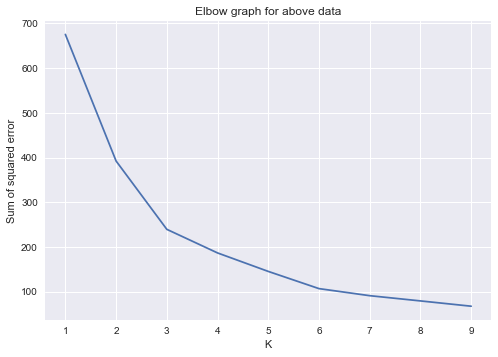

In [42]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[['x','y']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Elbow graph for above data')
plt.plot(k_rng,sse);


In [43]:
km = KMeans(n_clusters=2) #looking for two clusters
y_predicted = km.fit_predict(df1[['x','y']]) #x and y are column names of dataframe

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,

In [44]:
df1['subcluster1']=y_predicted
df1

/var/folders/4x/gdyl_l6j46q1w72692h1nnr80000gn/T/ipykernel_85681/1814864693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['subcluster1']=y_predicted


,comment,x,y,cluster,subcluster1
1,It's great that algorithms can help people in ...,1.048774,1.134794,0,0
2,“Your scientists were so preoccupied with whet...,-1.611482,0.668985,0,1
3,Everything needs energy to drive its movement....,-0.843080,0.920670,0,0
5,"As always, very enlightening. The design resea...",0.294542,-0.438839,0,0
6,“Once men turned their thinking over to machin...,-0.194918,0.360072,0,0
...,...,...,...,...,...
595,Woman and children should be a priority always...,-0.512669,0.691492,0,0
596,RESET- this is only applicable to cassette pla...,-1.292363,0.756731,0,1
597,A world without people,-2.416360,-0.008059,0,1
598,I went to the robot cafe three plus years ago ...,-0.737089,-0.055933,0,0


In [45]:
km.cluster_centers_

array([[-0.206658  ,  0.17900054],
       [-1.79422539,  0.10404094]])

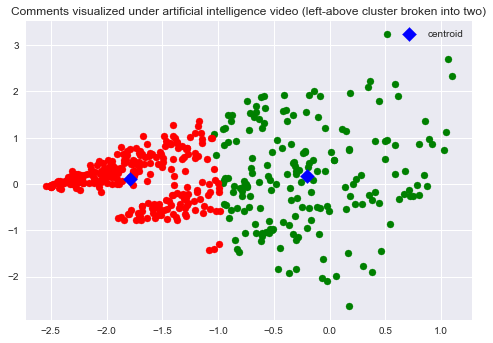

In [46]:
sub1 = df1[df1.subcluster1==0]
sub2 = df1[df1.subcluster1==1]
#sub3 = df1[df1.subcluster1==2]
#df4 = df[df.cluster==3]
plt.scatter(sub1.x,sub1.y,color='green')
plt.scatter(sub2.x,sub2.y,color='red')
#plt.scatter(sub3.x,sub3.y,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='D',s=100,label='centroid');
plt.title('Comments visualized under artificial intelligence video (left-above cluster broken into two)')
plt.rcParams['grid.color'] = ("1.0")
plt.legend()

In [47]:
dfle=df1[df1['subcluster1']==0]
dfle
#people seem to be commenting on the ppl that are in the video and their appreciation of the video 

,comment,x,y,cluster,subcluster1
1,It's great that algorithms can help people in ...,1.048774,1.134794,0,0
3,Everything needs energy to drive its movement....,-0.843080,0.920670,0,0
5,"As always, very enlightening. The design resea...",0.294542,-0.438839,0,0
6,“Once men turned their thinking over to machin...,-0.194918,0.360072,0,0
8,"26:45 ""the microphone isn't listening until it...",-0.004620,-0.593897,0,0
...,...,...,...,...,...
590,Artificial Intelligence is the Image of the BEAST,-0.834175,-1.396989,0,0
592,lol docotors are the 3rd leading cause of deat...,-0.299733,-1.213396,0,0
594,"AI can be used for good or bad, it's all on th...",-0.183397,-0.526191,0,0
595,Woman and children should be a priority always...,-0.512669,0.691492,0,0


In [48]:
print(df.iloc[(1,0)])
print(df.iloc[(5,0)])
print(df.iloc[(6,0)])
print(df.iloc[(9,0)])
print(df.iloc[(14,0)])
print(df.iloc[(164,0)])
print(df.iloc[(172,0)])
print(df.iloc[(173,0)])
print(df.iloc[(175,0)])
#from neutral to more negative side ppl seem to recognize that it it could potentially be useful but also dangerous at the wrong hands


It's great that algorithms can help people in different spheres of life, but robots are not free-thinking creatures, so they are not only useful for us, but also dangerous, because algorithms do not always lead to the right decisions and they can also limit our personal freedom of action.
As always, very enlightening. The design researchers comments on 996 culture are eyebrow-raising. People don't do this because they want to. They don't have a choice. One wonders if she's in touch with how the population truly feels at this point.
“Once men turned their thinking over to machines in the hope that this would set them free. But that only permitted other men with machines to enslave them.”

― Frank Herbert, Dune
This was great, keep up the great programs you make!
Honesty is hard to find. In business, nearly impossible. Great interview.
Wow, so if I will get some of these cars, I could make that decitions test first, in order that the machine consider my point of view in its automatic mod

In [49]:
dff=df1[df1['subcluster1']==1]
dff
 

,comment,x,y,cluster,subcluster1
2,“Your scientists were so preoccupied with whet...,-1.611482,0.668985,0,1
9,"This was great, keep up the great programs you...",-1.712354,-0.661527,0,1
12,One of the most thought-provoking documentarie...,-1.401414,-0.642638,0,1
14,"Honesty is hard to find. In business, nearly i...",-1.713026,0.274282,0,1
17,It seems to be an amazing AI journey ahead !!,-1.634812,0.855858,0,1
...,...,...,...,...,...
591,"if GOD wanted us to be all robots, he would ha...",-1.468591,0.938877,0,1
593,Ask a Chinese tourist or exchange student abou...,-1.268738,-0.222636,0,1
596,RESET- this is only applicable to cassette pla...,-1.292363,0.756731,0,1
597,A world without people,-2.416360,-0.008059,0,1


In [ ]:
#comments closer to -1 seem rather inethusiastic about the idea of AI shaping our future world, whereas those less than that seem to stand for it. we can further break this cluster down more

In [50]:
print(df.iloc[(4,0)])
print(df.iloc[(10,0)])
print(df.iloc[(11,0)])
print(df.iloc[(12,0)])
print(df.iloc[(20,0)])
print(df.iloc[(171,0)])
print(df.iloc[(174,0)])
print(df.iloc[(177,0)])
print(df.iloc[(179,0)])
#negative ppl talking about concrete uses for it  also some quotes and comenting on the documentary itself 


As I watched I kept returning to the scene of the jaywalker and how he was reduced in social value without human action. It was chilling on multiple levels. Not the least of which you arrived at in the example of autonomous vehicles but which could apply to medical care priority or even how long you wait in a line if all other things score equally. And. if anyone thinks those cameras are there for your security in an increasing number of Chinese restaurants think again in terms of social merit. It is inevitable that AI will allow someone to die in a car crash because you chewed with your mouth open. The reality is that AI will force conformity if allowed to through fear. (PS, You have lettuce stuck in your teeth and you left the tap on in the bathtub and you are receiving 11 demerits which means that you will be likely to be chosen to die in any of the following 42 scenarios) China is birthing a god apparently who will immediately extract retribution and give reward while eliminating s

In [51]:
pca=PCA(n_components=3)
x_pca=pca.fit_transform(x_vectorize) #changing scatter to three dimensions, experimenting

df['x']=x_pca[:,0]
df['y']=x_pca[:,1]
df['z']=x_pca[:,2]

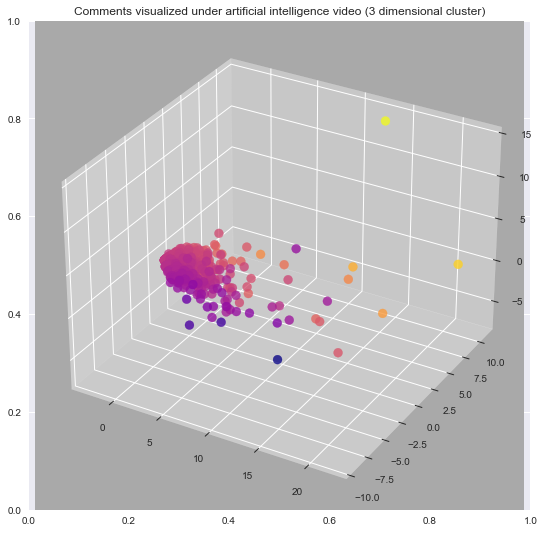

In [52]:
from mpl_toolkits import mplot3d
from matplotlib import cm

plt.figure(figsize = (9, 9));
plt.title('Comments visualized under artificial intelligence video (3 dimensional cluster)')
ax = plt.axes(projection='3d')
ax.set_facecolor('darkgrey') 
x = x_pca[:,0]
y = x_pca[:,1]
z = x_pca[:,2]
ax.scatter(x, y, z, s=80, c=y, alpha=0.8, cmap = cm.plasma);
